In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm

/Users/DannyChan/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
murderByStateByWeapon = pd.read_csv(open("murderByStateByWeapon.csv"))
murderByStateByWeapon.set_index('State', inplace=True)
murdersByState = murderByStateByWeapon[['Handguns','Shotguns', 'Rifles']]

temp = []
for index, row in murdersByState.iterrows():
    total = int(row.Handguns) + int(row.Shotguns) + int(row.Rifles)
    temp.append(total)
murdersByState['Total murders'] = temp  

[Text(0,0.5,'Murders'),
 Text(0.5,0,'State'),
 Text(0.5,1,'Murders per state by weapon')]

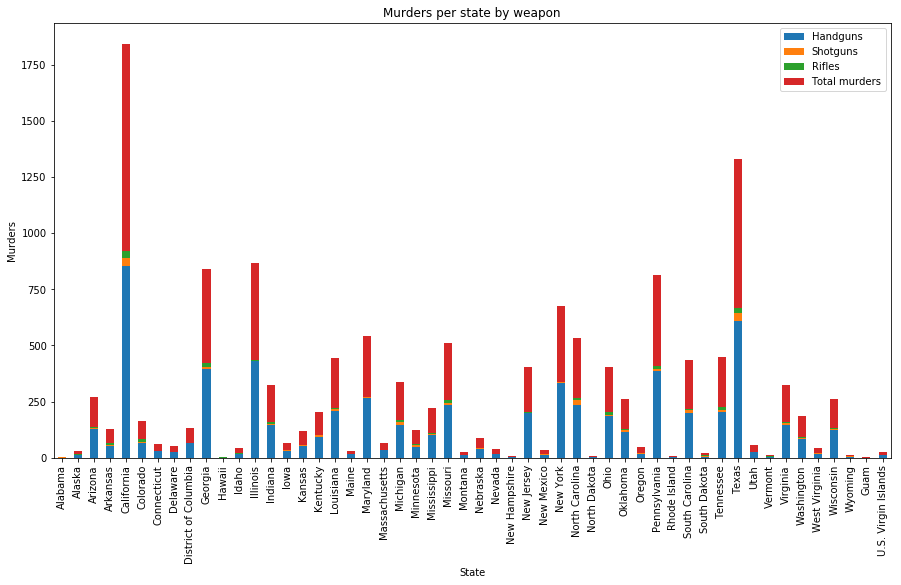

In [3]:
axes = murdersByState.plot.bar(figsize=(15,8), stacked=True)
axes.set(xlabel="State", ylabel="Murders", title="Murders per state by weapon")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c108e9f28>], dtype=object)

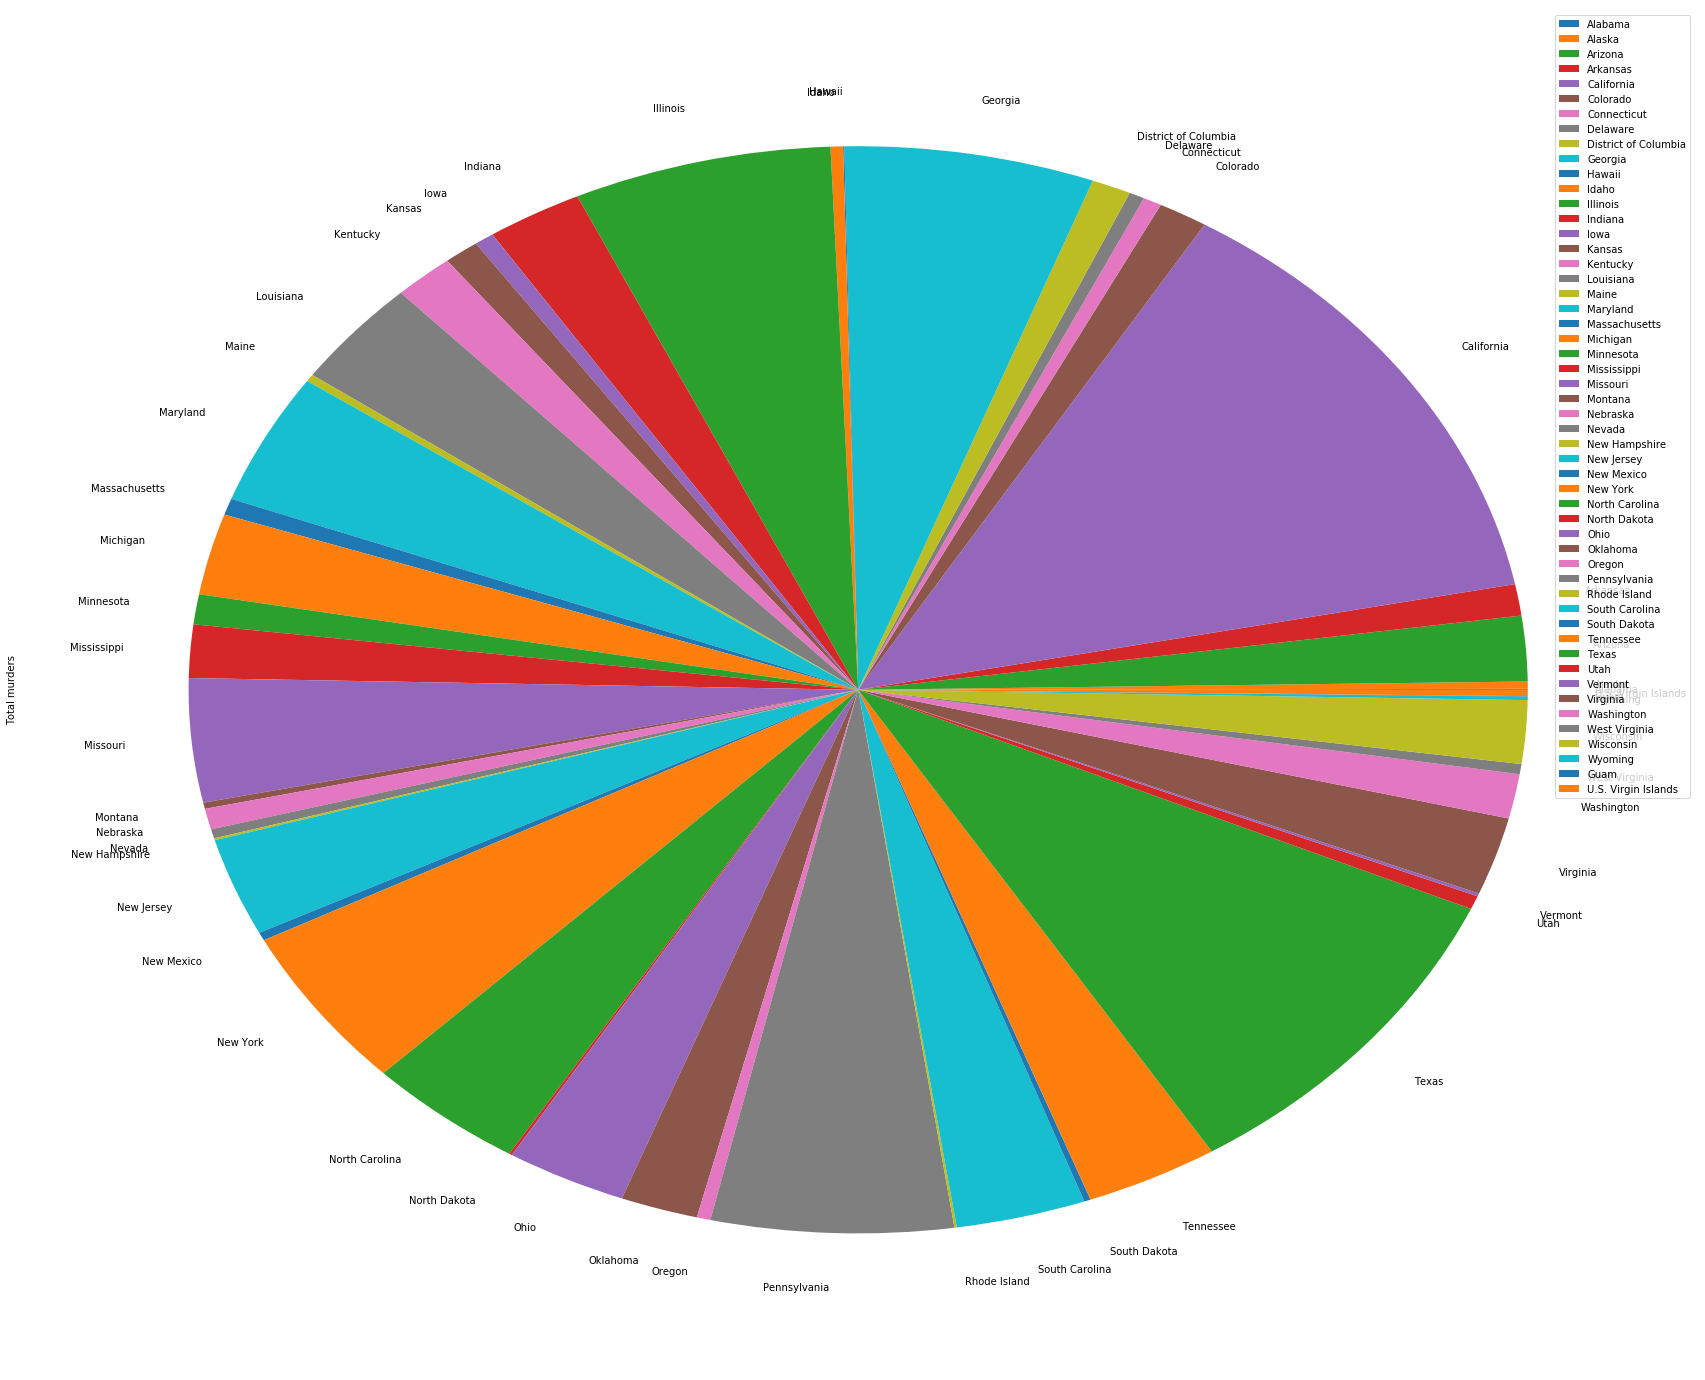

In [4]:
murdersByState[['Total murders']].plot.pie(subplots=True, figsize=(30, 25))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c15278978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c15cf4ac8>]], dtype=object)

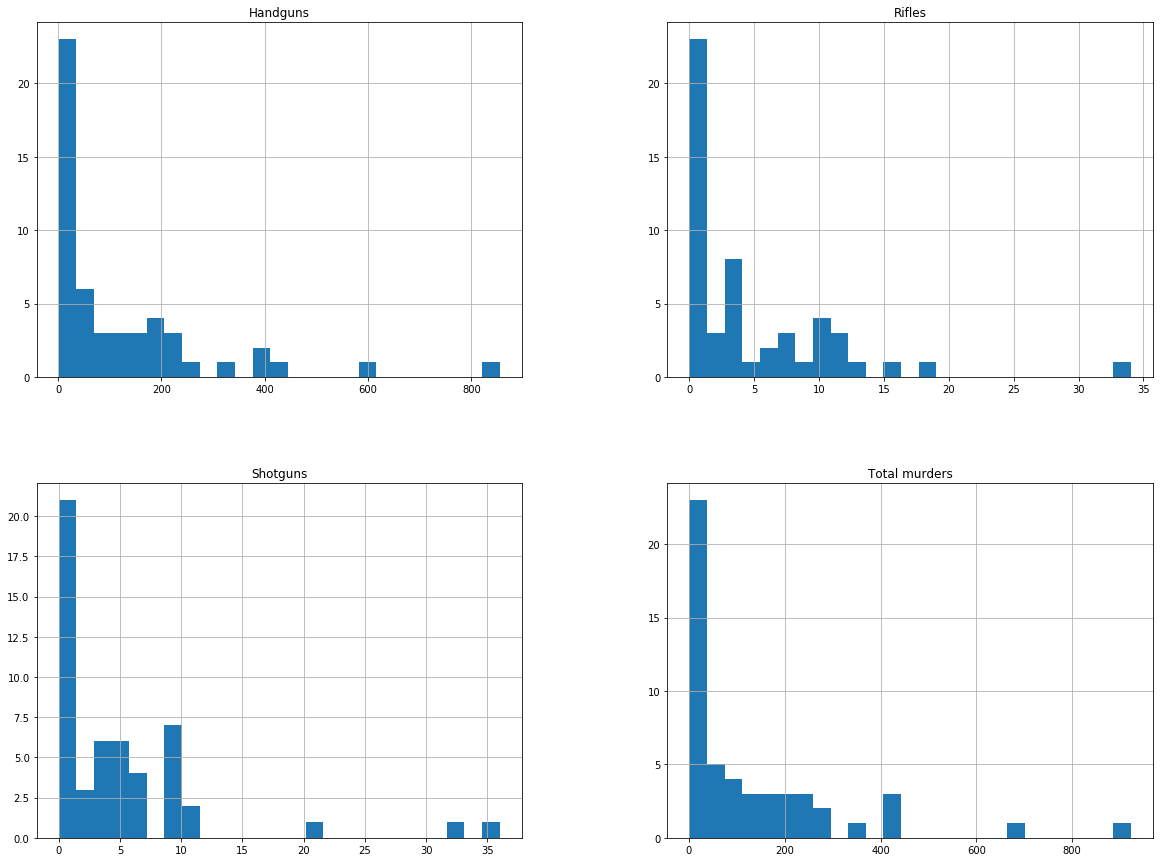

In [7]:
murdersByState.hist(bins=25, weights=np.ones_like(murdersByState[murdersByState.columns[0]]), figsize=(20, 15))

In [ ]:
murdersByState.plot.area(stacked=False, figsize=(25, 20))

In [ ]:
df_shootings = pd.read_csv(open('shootings.csv'))
df_shootings

In [ ]:
incident_count = {}
affected_count = {}
for i, row in df_shootings.iterrows():
    if row['State'] in incident_count:
        incident_count[row['State']] += 1
    else:
        incident_count[row['State']] = 1
        
    if row['State'] in affected_count:
        affected_count[row['State']] += (int(row['# Killed']) + int(row['# Injured']))
    else:
        affected_count[row['State']] = (int(row['# Killed']) + int(row['# Injured']))

In [ ]:
df_incident = pd.DataFrame([incident_count]).transpose()
df_affected = pd.DataFrame([affected_count]).transpose()

In [ ]:
df_incident.columns = ['# Mass Shootings Incident']
df_affected.columns = ['# Affected in Mass Shootings']

murdersByStateByWeaponVSMassShootings = pd.concat([murdersByState, df_incident, df_affected], axis=1)
murdersByStateByWeaponVSMassShootings = murdersByStateByWeaponVSMassShootings.fillna(0)
murdersByStateByWeaponVSMassShootings

In [ ]:
murdersByStateByWeaponVSMassShootings.plot(x='Total murders', y='# Affected in MassShootings', kind='scatter', figsize=(20,10), s=200)

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})


In [ ]:
sns.regplot(x='Total murders', y='# Affected in MassShootings', data=murdersByStateByWeaponVSMassShootings, fit_reg=True,  scatter_kws={'s':150 }) 

In [ ]:
sns.regplot(x='Total murders', y='# MassShootings Incident', data=murdersByStateByWeaponVSMassShootings, fit_reg=True, scatter_kws={'s':150 }) 

In [ ]:
totalMurdersVSMassShootingIncidents = murdersByStateByWeaponVSMassShootings[['Total murders','# MassShootings Incident']]
totalMurdersVSPeopleAffectedInMassShootings = murdersByStateByWeaponVSMassShootings[['Total murders','# Affected in MassShootings']]

In [ ]:
totalMurdersVSMassShootingIncidents.columns = ['murders', 'incidents']
totalMurdersVSPeopleAffectedInMassShootings.columns = ['murders', 'affected']

In [ ]:
out, pred = patsy.dmatrices('incidents ~ murders', totalMurdersVSMassShootingIncidents)
mod = sm.OLS(out, pred)
res = mod.fit()
print(res.summary())

In [ ]:
out, pred = patsy.dmatrices('affected ~ murders', totalMurdersVSPeopleAffectedInMassShootings)
mod = sm.OLS(out, pred)
res = mod.fit()
print(res.summary())